In [62]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/dollar.csv', delimiter=',')

data['annual growth ratio'] = data['annual growth ratio'].str.rstrip('%')
data['year'] = data['year'].str.replace('*', '')

data = data.apply(pd.to_numeric, errors='coerce')

# Remove rows with missing values
data.dropna(subset=['year', 'dollar market price'], inplace=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-62-a3277bb0d897>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['year'] = data['year'].str.replace('*', '')


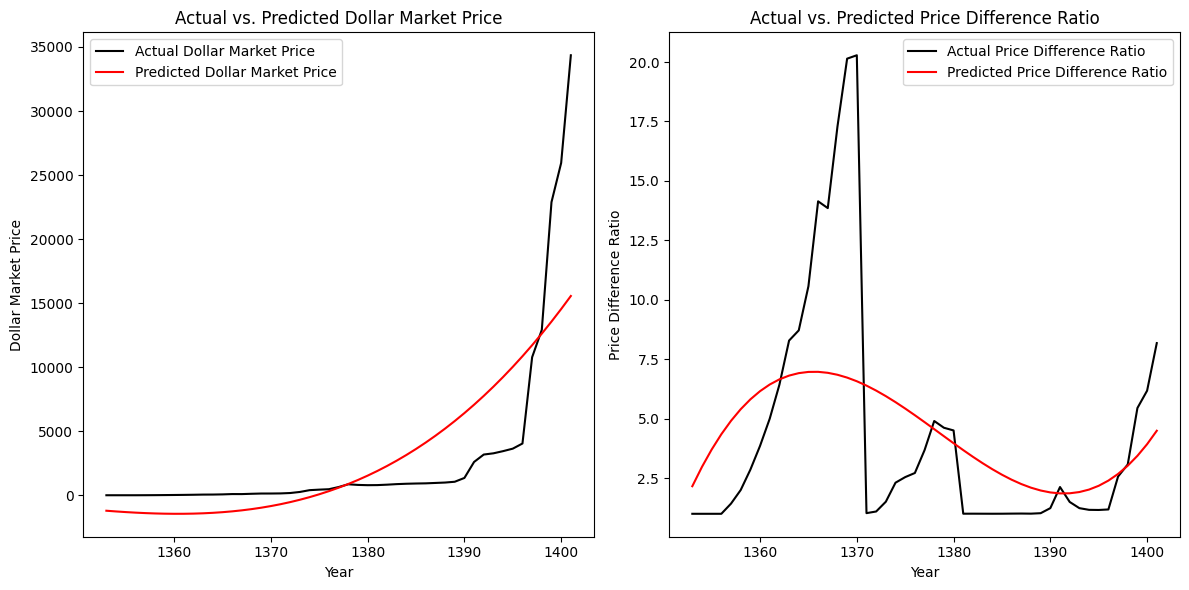

In [63]:
import matplotlib.pyplot as plt

year = data['year']
dollar_market_price = data['dollar market price']
dollar_official_price = data['dollar official price']

price_difference_ratio = dollar_market_price / dollar_official_price

# Normalize the year values
year_normalized = (year - year.min()) / (year.max() - year.min())

# polynomial degree
degree = 3

# Create the polynomial features
X_dollar_market_price = np.column_stack([np.ones(len(year_normalized)), year_normalized, year_normalized**2, year_normalized**3])
X_price_difference_ratio = np.column_stack([np.ones(len(year_normalized)), year_normalized, year_normalized**2, year_normalized**3])

# Initialize the theta values
theta_dollar_market_price = np.zeros(degree + 1)
theta_price_difference_ratio = np.zeros(degree + 1)

# learning rate and number of iterations
learning_rate_dollar_market_price = 0.05
iterations_dollar_market_price = 1000

# learning rate and number of iterations
learning_rate_price_difference_ratio = 0.5
iterations_price_difference_ratio = 10000

# Perform gradient descent
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    for iteration in range(iterations):
        hypothesis = np.dot(X, theta)
        loss = hypothesis - y
        #print(np.sum(loss**2))
        gradient = np.dot(X.T, loss)/m
        theta = theta - learning_rate * gradient
        # print(loss)
    return theta


# Calculate the predicted Dollar Market Price
theta_dollar_market_price = gradient_descent(X_dollar_market_price, dollar_market_price, theta_dollar_market_price, learning_rate_dollar_market_price, iterations_dollar_market_price)
predicted_dollar_market_price = X_dollar_market_price.dot(theta_dollar_market_price)

# Calculate the predicted price_difference_ratio
theta_price_difference_ratio = gradient_descent(X_price_difference_ratio, price_difference_ratio, theta_price_difference_ratio, learning_rate_price_difference_ratio, iterations_price_difference_ratio)
predicted_price_difference_ratio = X_price_difference_ratio.dot(theta_price_difference_ratio)

#plots
plt.figure(figsize=(12, 6))

#Dollar market price
plt.subplot(1, 2, 1)
plt.plot(year, dollar_market_price, label="Actual Dollar Market Price", color="black")
plt.plot(year, predicted_dollar_market_price, label="Predicted Dollar Market Price", color="red")
plt.xlabel("Year")
plt.ylabel("Dollar Market Price")
plt.title("Actual vs. Predicted Dollar Market Price")
plt.legend()

#Price difference ratio
plt.subplot(1, 2, 2)
plt.plot(year, price_difference_ratio, label="Actual Price Difference Ratio", color="black")
plt.plot(year, predicted_price_difference_ratio, label="Predicted Price Difference Ratio", color="red")
plt.xlabel("Year")
plt.ylabel("Price Difference Ratio")
plt.title("Actual vs. Predicted Price Difference Ratio")
plt.legend()

plt.tight_layout()
plt.show()